### CNN_for_CIFAR_10_Data

CIFAR 10 Dataseti, 10 farklı kategoriden 32x32 boyutunda 60000 resime sahiptir, 50000 train, 10000 test datasını olduğu veriyi içe aktarıp sınıflandırmak için Tensorflow,Keras ve CNN modellerini kullandık.



<img src='https://storage.googleapis.com/kaggle-datasets-images/366471/714968/493e1ab48c7e8da430ea346627f30751/dataset-cover.png?t=2019-10-01-13-08-02'>

## Project Overview
This project demonstrates the implementation of a Convolutional Neural Network (CNN) for image classification on the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, such as airplanes, cars, birds, and more.

## Key Features
Data preprocessing: Normalizing the pixel values and converting the images to a suitable format for the CNN model.
CNN architecture design: Building a CNN model with convolutional, pooling, and fully connected layers to extract features and classify the images.
Model training and optimization: Training the CNN model using techniques like data augmentation, learning rate scheduling, and early stopping to improve its performance.
Model evaluation: Assessing the model's performance on the test set using metrics like accuracy, precision, recall, and F1-score.
Visualization: Plotting the training and validation loss/accuracy curves to monitor the model's learning progress.

## Usage
Clone the repository to your local machine.
Install the required dependencies, such as NumPy, Pandas, Matplotlib, and TensorFlow/Keras.
Open the Jupyter Notebook or Python script and run the code.
Explore the dataset, adjust the model architecture or hyperparameters, and observe the impact on the model's performance.

## Results
The final CNN model achieved an accuracy of approximately 90% on the CIFAR-10 test set. The performance can be further improved by experimenting with different network architectures, optimization techniques, and data augmentation strategies.

## Contributions
Contributions to this project are welcome. If you find any issues or have suggestions for improvements, please feel free to create a new issue or submit a pull request.

## License
This project is licensed under the MIT License.

In [2]:
import os # dosya dizin için
import cv2

In [3]:
cifar=tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
# cifar dataseti yükleyip train ve test diye ayırdık

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0  # resimleri normalize ediyoruz derste öğrendğimiz gibi

In [5]:
train_images.shape

(50000, 32, 32, 3)

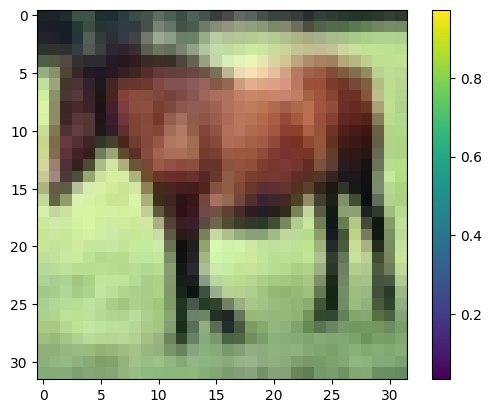

In [6]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()
# 7.resme bakalım, at galiba.
# cifar dataset renkli görüntülerden oluştuğu için sihaybeyaz yapamayız, ancak dönüştürmemiz gerek bunun için.

In [7]:
train_images[7]
# resimler sayı demekti
# bu resmin sayı halini görüyoruz

array([[[0.10980392, 0.1372549 , 0.15294118],
        [0.11764706, 0.13333333, 0.17254902],
        [0.12941176, 0.17254902, 0.18431373],
        ...,
        [0.16862745, 0.21960784, 0.17647059],
        [0.20392157, 0.25098039, 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078431],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.43921569, 0.53333333, 0.38039216],
        [0.45882353, 0.54901961, 0.39607843],
        [0.45098039, 0.54117647, 0.39215686]],

       [[0.13333333, 0.14117647, 0.16470588],
        [0.12941176, 0.12941176, 0.16862745],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.68627451, 0.81568627, 0.56078431],
        [0.69411765, 0.81960784, 0.56470588],
        [0.69019608, 0.81568627, 0.56078431]],

       ...,

       [[0.55686275, 0.69019608, 0.4627451 ],
        [0.55686275, 0.69019608, 0.4627451 ],
        [0.58823529, 0

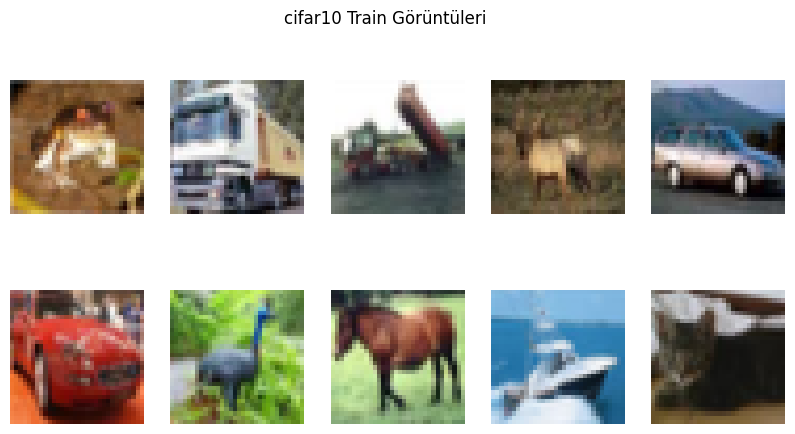

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2 ,5, i+1)
  plt.imshow(train_images[i])
  plt.axis('off')
plt.suptitle('cifar10 Train Görüntüleri')
plt.show()
# trainden 10 resme bakalım

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Reshape, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

* 50 epoch yapmama rağmen başarı oranım 79 da kaldı,daha sonra kernel sizes arttırdım, conv2 64 ve 128 yaptım, drop out ve batchnorm uyguladım, bir de to categorical fonksiyonu ekledim, çünkü veri setimiz katekorik yani kedi kuş at gibi sınıf etiketleri var veride, bu yüzden bu bu değerleri one-hot encoding formatına dönüştürdük,böylece her bir kategoriyi bir sutuna karşılık gelen bir bit değeri ile temsil etti, mesela "kedi" sınıfı 1,-0,-0  gibi, bu dönüşüm sayesinde algoritma daha etkin bi ekilde işledi, kısaca kategorik değerleri eğitim için uygun bir biçime getirdi ve başarı oranım biraz daha arttı.

In [11]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 3)))
model.add(Reshape(target_shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
history=model.fit(train_images,train_labels,validation_split=0.10,epochs=50,verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 19s 9ms/step - loss: 1.8569 - accuracy: 0.3537 - val_loss: 2.3302 - val_accuracy: 0.2524
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3592 - accuracy: 0.5200 - val_loss: 1.1827 - val_accuracy: 0.5664
Epoch 3/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.1931 - accuracy: 0.5877 - val_loss: 1.0231 - val_accuracy: 0.6394
Epoch 4/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0821 - accuracy: 0.6284 - val_loss: 1.2093 - val_accuracy: 0.5896
Epoch 5/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.9869 - accuracy: 0.6621 - val_loss: 1.1182 - val_accuracy: 0.6114
Epoch 6/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9229 - accuracy: 0.6859 - val_loss: 1.0175 - val_accuracy: 0.6442
Epoch 7/50
1407/1407 [==============================] - 12s 8ms/step - loss: 0.8562 - accuracy: 0.7103 - val_loss: 0.9365 - val_accuracy: 0.6

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 128)       5

* Modelin toplam parametresi 629962'dir ve tüm parametreler eğitilebilir durumdadır. Bu model, 10 sınıflı bir görüntü sınıflandırma problemi için kullanılabilir.

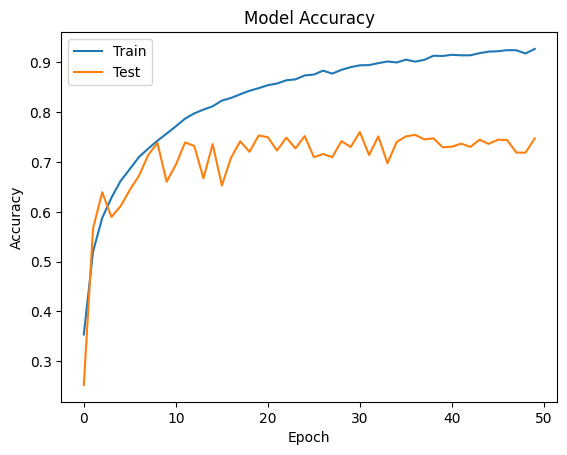

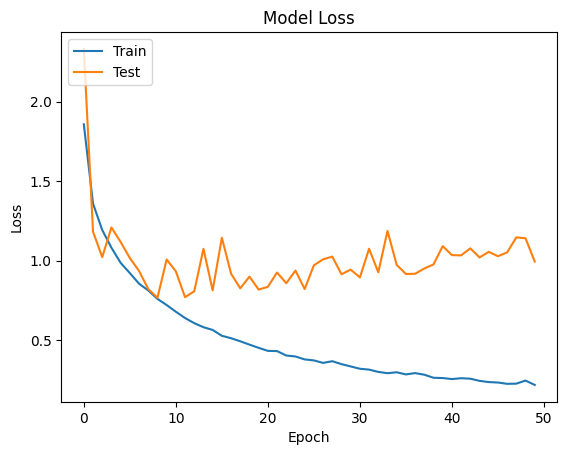

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

* ilk grafik, modelin eğitim ve test veri setleri için her epokta elde edilen accuracy değerlerini gösterir.

* İkinci grafik, modelin eğitim ve test veri setleri için her epokta elde edilen loss değerlerini gösterir, modelin eğitimi sırasındaki iyileşmeyi görmenizi sağlar, aradaki fark, modelin overfitting olup olmadığını da gösterir.

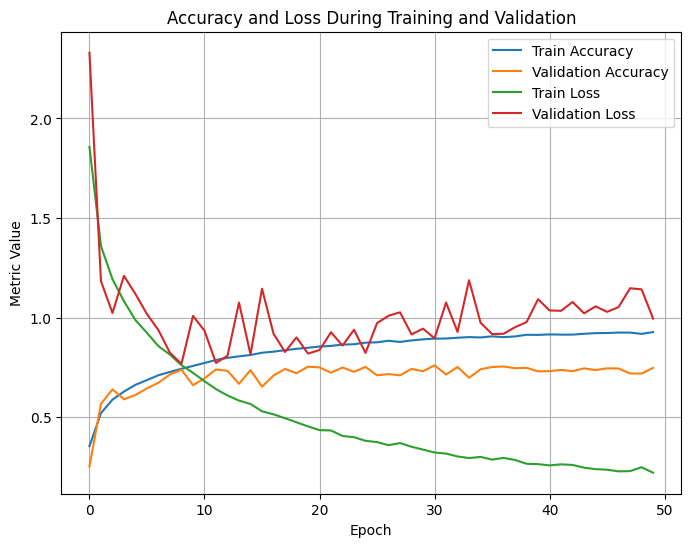

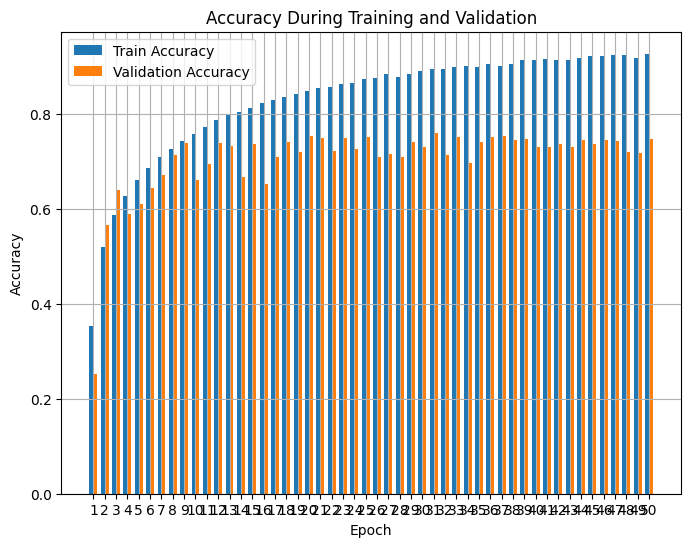

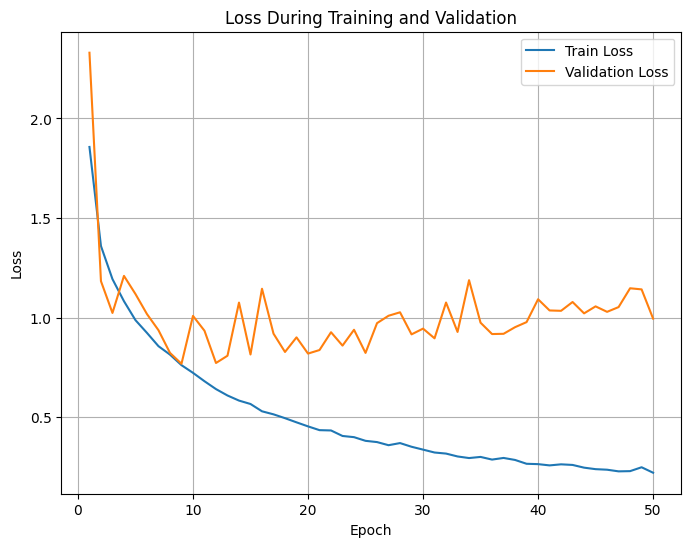

In [26]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama Accuracy ve Loss değerleri
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

# Grafik 1: Çizgi Grafiği
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Accuracy and Loss During Training and Validation")
plt.legend()
plt.grid()
plt.show()

# Grafik 2: Çubuk Grafiği
epochs = list(range(1, len(train_acc) + 1))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([x - width/2 for x in epochs], train_acc, width, label="Train Accuracy")
ax.bar([x + width/2 for x in epochs], val_acc, width, label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy During Training and Validation")
ax.set_xticks(epochs)
ax.legend()
plt.grid()
plt.show()

# Grafik 3: Çizgi Grafiği
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(epochs, train_loss, label="Train Loss")
ax.plot(epochs, val_loss, label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss During Training and Validation")
ax.legend()
plt.grid()
plt.show()

* Çizgi Grafiği:
Bu ilk grafik, train accuracy, validation accuracy, eğitim kaybı ve doğrulama kaybını eğitim devreleri boyunca gösteriyor.
Bu grafik, modelin performansının eğitim sırasında nasıl geliştiğini ve eğitim ve doğrulama ölçümlerinin nasıl karşılaştığın gösterir.

* Çubuk Grafiği:
İkinci grafik, train accuracy ve validation accuracy yan yana çubuk grafik biçiminde gösterir, karşılaştırılmasını sağlar.
Çizgi Grafiği:

* Üçüncü grafik, 1. grafikle aynı aslında

In [37]:
# Sınıf etiketlerini görüntüle
print("CIFAR-10 Sınıf Etiketleri:")
print(cifar10.classes)

CIFAR-10 Sınıf Etiketleri:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


* Confusion Matrixi grafikte göstermek istedim fakat kodum birtürlu olmadı, çok uğraştım. sınıf etiketlerini bunu için yazdırmıştım. Deeplearning olduğu için bunun mümkün olmayabilir.

* sonuç olarak modelimiz %93 accuracy ile başarılı bir performans gösterdi, cifar 10 dataset için iyi bir CNN modeli oldu.